In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import os 
import pandas as pd 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/WILDFIRE/Database Not Kidding!/data.csv') # change to shared drive when you run

<ipython-input-3-8fbab7ab8519>:1: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,26,27,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/WILDFIRE/Database Not Kidding!/data.csv') # change to shared drive when you run


In [4]:
df_notKidding = df[['FIRE_YEAR', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 
                    'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 
                    'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
                    'LONGITUDE', 'STATE']]
# df_notKidding.head()  
print(f"Null value classes: \n{df_notKidding.isna().sum()}")

Null value classes: 
FIRE_YEAR                         0
DISCOVERY_DOY                     0
DISCOVERY_TIME               789095
NWCG_CAUSE_CLASSIFICATION         0
NWCG_GENERAL_CAUSE                0
CONT_DATE                    894813
CONT_DOY                     894813
CONT_TIME                    990880
FIRE_SIZE                         0
FIRE_SIZE_CLASS                   0
LATITUDE                          0
LONGITUDE                         0
STATE                             0
dtype: int64


In [5]:
# helper processes -> shape of data
print(f"1: {df_notKidding.shape}")
df_notKidding = df_notKidding.dropna()
print(f"2: {df_notKidding.shape}") 
df_notKidding.head()

1: (2303566, 13)
2: (1276794, 13)


,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,2005,33,1300.0,Human,Power generation/transmission/distribution,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,CA
1,2004,133,845.0,Natural,Natural,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,CA
2,2004,152,1921.0,Human,Debris and open burning,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,CA
3,2004,180,1600.0,Natural,Natural,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,CA
4,2004,180,1600.0,Natural,Natural,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,CA


In [6]:
# calculation of average duration of fire
def duration_ofFire(yourDataframe: pd.DataFrame):
  #****
  dayConstant = 24*60

  # helper arrays
  discoveryDay_array = np.array(yourDataframe['DISCOVERY_DOY'])
  discoveryTime_array = np.array(yourDataframe['DISCOVERY_TIME'])
  containmentDay_array = np.array(yourDataframe['CONT_DOY'])
  containmentTime_array = np.array(yourDataframe['CONT_TIME'])

  #*****
  list_avgDuration_ofFire = []
  for i in range(len(discoveryDay_array)):
    var_placeholder = 0
    if discoveryDay_array[i] == containmentDay_array[i]:
      var_placeholder = (abs(containmentTime_array[i] - discoveryTime_array[i]))*0.6
    else:
      var_placeholder = (abs(containmentDay_array[i] - discoveryDay_array[i]))*dayConstant
      '''
      *************************************
      REMINDER:
      counted only days when
      we have different cntainment day
      w.r.t discovery day -> To be changed 
      for more precise calculations later on
      **************************************
      '''  
    list_avgDuration_ofFire.append(var_placeholder)
  
  return np.array(list_avgDuration_ofFire)

In [7]:
# dictionary of season codes
seasonCode = {
    "Spring": 4,
    "Summer": 8,
    "Fall": 12,
    "Winter": 16
}
seasonCode

{'Spring': 4, 'Summer': 8, 'Fall': 12, 'Winter': 16}

In [8]:
# meteorological season info -> dataset 
def seasons(yourDataframe: pd.DataFrame):

  # helper array
  discoveryDay_array = np.array(yourDataframe['DISCOVERY_DOY'])
  
  #*****
  list_seasons = []
  for i in range(len(discoveryDay_array)):
    var_placeholder = 0
    if discoveryDay_array[i] >= 60 and discoveryDay_array[i] <= 151:
      var_placeholder = 4
    elif discoveryDay_array[i] >= 152 and discoveryDay_array[i] <= 244:
      var_placeholder = 8
    elif discoveryDay_array[i] >= 245 and discoveryDay_array[i] <= 336:
      var_placeholder = 12
    else:
      var_placeholder = 16
    list_seasons.append(var_placeholder)
  
  return np.array(list_seasons)

'********************************************************************'
# function to be added later on for the completeness of our dataFrame
'''def seasonInfo(yourDataframe: pd.DataFrame):'''


'def seasonInfo(yourDataframe: pd.DataFrame):'

In [9]:
# creating state codes
df_notKidding_stateArray = np.unique(np.array(df_notKidding['STATE']))
df_notKidding_stateCode = np.arange(start=1, stop=53, step=1)

stateCode = {}
for x, y in zip(df_notKidding_stateCode, df_notKidding_stateArray):
    stateCode[x] = y

print(stateCode) # use this dictionary get the state codes

{1: 'AK', 2: 'AL', 3: 'AR', 4: 'AZ', 5: 'CA', 6: 'CO', 7: 'CT', 8: 'DC', 9: 'DE', 10: 'FL', 11: 'GA', 12: 'HI', 13: 'IA', 14: 'ID', 15: 'IL', 16: 'IN', 17: 'KS', 18: 'KY', 19: 'LA', 20: 'MA', 21: 'MD', 22: 'ME', 23: 'MI', 24: 'MN', 25: 'MO', 26: 'MS', 27: 'MT', 28: 'NC', 29: 'ND', 30: 'NE', 31: 'NH', 32: 'NJ', 33: 'NM', 34: 'NV', 35: 'NY', 36: 'OH', 37: 'OK', 38: 'OR', 39: 'PA', 40: 'PR', 41: 'RI', 42: 'SC', 43: 'SD', 44: 'TN', 45: 'TX', 46: 'UT', 47: 'VA', 48: 'VT', 49: 'WA', 50: 'WI', 51: 'WV', 52: 'WY'}


In [10]:
state_to_code = {val: key for key, val in stateCode.items()}
state_to_code

{'AK': 1,
 'AL': 2,
 'AR': 3,
 'AZ': 4,
 'CA': 5,
 'CO': 6,
 'CT': 7,
 'DC': 8,
 'DE': 9,
 'FL': 10,
 'GA': 11,
 'HI': 12,
 'IA': 13,
 'ID': 14,
 'IL': 15,
 'IN': 16,
 'KS': 17,
 'KY': 18,
 'LA': 19,
 'MA': 20,
 'MD': 21,
 'ME': 22,
 'MI': 23,
 'MN': 24,
 'MO': 25,
 'MS': 26,
 'MT': 27,
 'NC': 28,
 'ND': 29,
 'NE': 30,
 'NH': 31,
 'NJ': 32,
 'NM': 33,
 'NV': 34,
 'NY': 35,
 'OH': 36,
 'OK': 37,
 'OR': 38,
 'PA': 39,
 'PR': 40,
 'RI': 41,
 'SC': 42,
 'SD': 43,
 'TN': 44,
 'TX': 45,
 'UT': 46,
 'VA': 47,
 'VT': 48,
 'WA': 49,
 'WI': 50,
 'WV': 51,
 'WY': 52}

In [11]:
def assignStateCodes(yourDataframe: pd.DataFrame):
  # creating state codes
  yourDataframe_stateArray = np.unique(np.array(yourDataframe['STATE']))
  yourDataframe_stateCode = np.arange(start=1, stop=53, step=1)

  stateCode = {}
  for x, y in zip(yourDataframe_stateArray, yourDataframe_stateCode):
      stateCode[x] = y

  # print(stateCode) # use this dictionary get the state codes

  # actual conditions
  stateArray = np.array(yourDataframe['STATE'])
  list_ofStateCodes = []
  for i in range(len(stateArray)):
    stateKey = stateArray[i]
    stateValue = stateCode[stateKey]
    list_ofStateCodes.append(stateValue)

  return np.array(list_ofStateCodes)

In [12]:
# helper arrays 

'''***********codings are used such a way that integer multiple {weight} 
              can make them to same final value each if required******************'''

df_notKidding_CauseClassify = np.unique(np.array(df_notKidding['NWCG_CAUSE_CLASSIFICATION']))
df_notKidding_CauseClassifyCode = np.arange(start=33, stop=100, step=33)

df_notKidding_Cause = np.unique(np.array(df_notKidding['NWCG_GENERAL_CAUSE']))
df_notKidding_CauseCode = np.arange(start=3, stop=40, step=3)

df_notKidding_FireSizeClass = np.unique(np.array(df_notKidding['FIRE_SIZE_CLASS']))
df_notKidding_FireSizeClassCode = np.arange(start=20, stop=141, step=20)

# helper dicts
CauseClassify = {}
for x, y in zip(df_notKidding_CauseClassifyCode, df_notKidding_CauseClassify):
    CauseClassify[x] = y

print(CauseClassify) # use this dictionary get the cause classifications

Cause = {}
for x, y in zip(df_notKidding_CauseCode, df_notKidding_Cause):
    Cause[x] = y

print(Cause) # use this dictionary get the cause descriptions

FireSizeClass = {}
for x, y in zip(df_notKidding_FireSizeClassCode, df_notKidding_FireSizeClass):
    FireSizeClass[x] = y

print(FireSizeClass) # use this dictionary get the Fire Size Class

{33: 'Human', 66: 'Missing data/not specified/undetermined', 99: 'Natural'}
{3: 'Arson/incendiarism', 6: 'Debris and open burning', 9: 'Equipment and vehicle use', 12: 'Firearms and explosives use', 15: 'Fireworks', 18: 'Missing data/not specified/undetermined', 21: 'Misuse of fire by a minor', 24: 'Natural', 27: 'Other causes', 30: 'Power generation/transmission/distribution', 33: 'Railroad operations and maintenance', 36: 'Recreation and ceremony', 39: 'Smoking'}
{20: 'A', 40: 'B', 60: 'C', 80: 'D', 100: 'E', 120: 'F', 140: 'G'}


In [13]:
def assignCauseClassification(yourDataframe: pd.DataFrame):
  # helper array
  causeClassify_array = np.array(yourDataframe['NWCG_CAUSE_CLASSIFICATION'])
  
  #*****
  list_causeClassify = []
  for i in range(len(causeClassify_array)):
    var_placeholder = 0
    if causeClassify_array[i] == "Human":
      var_placeholder = 33
    elif causeClassify_array[i] == "Missing data/not specified/undetermined":
      var_placeholder = 66
    else:
      var_placeholder = 99
    list_causeClassify.append(var_placeholder)
    
  return np.array(list_causeClassify)

In [14]:
def assignFireSizeClassCodes(yourDataframe: pd.DataFrame):
  # creating state codes
  yourDataframe_FireSizeClass = np.unique(np.array(yourDataframe['FIRE_SIZE_CLASS']))
  yourDataframe_FireSizeClassCode = np.arange(start=20, stop=141, step=20)

  FireSizeClassCode = {}
  for x, y in zip(yourDataframe_FireSizeClass, yourDataframe_FireSizeClassCode):
      FireSizeClassCode[x] = y

  # actual conditions
  FireSizeClassArray = np.array(yourDataframe['FIRE_SIZE_CLASS'])
  list_of_FireSizeClassCodes = []
  for i in range(len(FireSizeClassArray)):
    FireSizeClassKey = FireSizeClassArray[i]
    FireSizeClassValue = FireSizeClassCode[FireSizeClassKey]
    list_of_FireSizeClassCodes.append(FireSizeClassValue)

  return np.array(list_of_FireSizeClassCodes)

In [15]:
def assignCauseCodes(yourDataframe: pd.DataFrame):
  # creating state codes
  yourDataframe_Cause = np.unique(np.array(yourDataframe['NWCG_GENERAL_CAUSE']))
  yourDataframe_CauseCode = np.arange(start=3, stop=40, step=3)

  CauseCode = {}
  for x, y in zip(yourDataframe_Cause, yourDataframe_CauseCode):
      CauseCode[x] = y

  # print(stateCode) # use this dictionary get the state codes

  # actual conditions
  CauseArray = np.array(yourDataframe['NWCG_GENERAL_CAUSE'])
  list_ofCauseCodes = []
  for i in range(len(CauseArray)):
    CauseKey = CauseArray[i]
    CauseValue = CauseCode[CauseKey]
    list_ofCauseCodes.append(CauseValue)

  return np.array(list_ofCauseCodes)

In [16]:
df_notKidding['FIRE_DURATION'] = duration_ofFire(df_notKidding)
df_notKidding['SEASONS'] = seasons(df_notKidding)
df_notKidding['STATE_CODES'] = assignStateCodes(df_notKidding)
df_notKidding['CAUSE_CLASSIFICATION_CODES'] = assignCauseClassification(df_notKidding)
df_notKidding['CAUSE_CODES'] = assignCauseCodes(df_notKidding)
df_notKidding['FIRE_SIZE_CLASS_CODES'] = assignFireSizeClassCodes(df_notKidding)
df_notKidding

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_DURATION,SEASONS,STATE_CODES,CAUSE_CLASSIFICATION_CODES,CAUSE_CODES,FIRE_SIZE_CLASS_CODES
0,2005,33,1300.0,Human,Power generation/transmission/distribution,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,CA,258.0,16,5,33,30,20
1,2004,133,845.0,Natural,Natural,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,CA,411.0,4,5,99,24,20
2,2004,152,1921.0,Human,Debris and open burning,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,CA,61.8,8,5,33,6,20
3,2004,180,1600.0,Natural,Natural,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,CA,7200.0,8,5,99,24,20
4,2004,180,1600.0,Natural,Natural,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,CA,7200.0,8,5,99,24,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303510,2019,354,1353.0,Human,Smoking,12/20/2019,354.0,1416.0,1.00,B,32.478000,-87.041000,AL,37.8,16,2,33,39,40
2303511,2019,359,1231.0,Human,Missing data/not specified/undetermined,12/25/2019,359.0,1510.0,7.00,B,31.299000,-86.820000,AL,167.4,16,2,33,18,40
2303512,2019,361,2059.0,Human,Debris and open burning,12/28/2019,362.0,1038.0,0.10,A,33.223000,-87.021000,AL,1440.0,16,2,33,6,20
2303564,2020,230,755.0,Natural,Natural,8/20/2020,233.0,1900.0,24892.00,G,46.670340,-120.114500,WA,4320.0,8,49,99,24,140


In [17]:
df['STATE_CODES'] = assignStateCodes(df)

In [18]:
# checkpoint -> 1 [Lowest Value and Count of Unique Values] -> Count of wildfires w.r.t years | statewise 

def whatsTheCount (yourDataframe: pd.DataFrame, code: int):

  state_Code = stateCode[code]

  stateDataframe = yourDataframe.loc[yourDataframe['STATE'] == state_Code]
  stateDataframe = stateDataframe[stateDataframe.FIRE_YEAR != 2020]

  checkpoint1_array = np.array(stateDataframe['FIRE_YEAR'])
  uniqueValueCounts = np.unique(checkpoint1_array, return_counts='True')


  df_absMadness = pd.DataFrame(uniqueValueCounts[0], columns=['FIRE_YEAR'])
  df_absMadness['NUMBER_OF_FIRES'] = uniqueValueCounts[1]

  return df_absMadness


In [19]:
def stack_returnStateData (yourDataframe: pd.DataFrame, code: int):

  state_Code = stateCode[code]

  stateDataframe = yourDataframe.loc[yourDataframe['STATE'] == state_Code]

  return stateDataframe

In [20]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth = 8):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=10)
    plt.show()

In [21]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [22]:
# only count of wildfire incidents data for every state
list_stateData = []
for i in range(1, 53):
    globals()[f"state_{i}"] = whatsTheCount(df_notKidding, i)
    list_stateData.append(globals()[f"state_{i}"])


In [23]:
# data -> entire stackfor every state
list_stateDataStack = []
for i in range(1, 53):
    globals()[f"state_{i}"] = stack_returnStateData(df_notKidding, i)
    list_stateDataStack.append(globals()[f"state_{i}"])

In [24]:
# index -> (state code - 1)
print(f"number of bins required: {list_stateData[4].shape[0]}")
california = list_stateData[4]
california.head()

number of bins required: 28


,FIRE_YEAR,NUMBER_OF_FIRES
0,1992,4100
1,1993,2441
2,1994,3071
3,1995,2347
4,1996,3356


In [25]:
# index -> (state code - 1)
print(f"number of bins required: {list_stateData[4].shape[0]}")
californiaStack = list_stateDataStack[4]
californiaStack.head()

number of bins required: 28


,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_DURATION,SEASONS,STATE_CODES,CAUSE_CLASSIFICATION_CODES,CAUSE_CODES,FIRE_SIZE_CLASS_CODES
0,2005,33,1300.0,Human,Power generation/transmission/distribution,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,CA,258.0,16,5,33,30,20
1,2004,133,845.0,Natural,Natural,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,CA,411.0,4,5,99,24,20
2,2004,152,1921.0,Human,Debris and open burning,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,CA,61.8,8,5,33,6,20
3,2004,180,1600.0,Natural,Natural,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,CA,7200.0,8,5,99,24,20
4,2004,180,1600.0,Natural,Natural,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,CA,7200.0,8,5,99,24,20


In [26]:
# plot number of wildfire occurances [X: Years | Y: No. of wildfire incidents]
def plotStateData_Yearwise (statecode: int):
  fig = plt.figure()
  plt.figure(figsize=(18,3))
  plt.plot(list_stateData[statecode - 1]["FIRE_YEAR"], list_stateData[statecode - 1]["NUMBER_OF_FIRES"])
  plt.title(f'{stateCode[statecode]} Data w.r.t Years', fontdict={'fontsize':15})
  plt.xlabel('Years')
  plt.ylabel('No. of Wildfires')
  plt.xticks(range(1992, 2020))
  plt.show()


<Figure size 432x288 with 0 Axes>

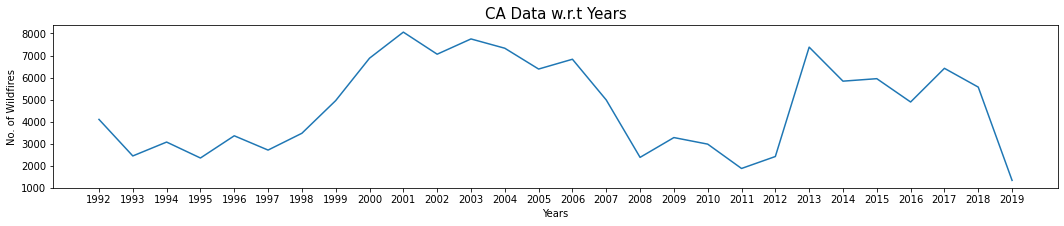

In [27]:
# california
plotStateData_Yearwise(5)

<ipython-input-20-aa950383fd1f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


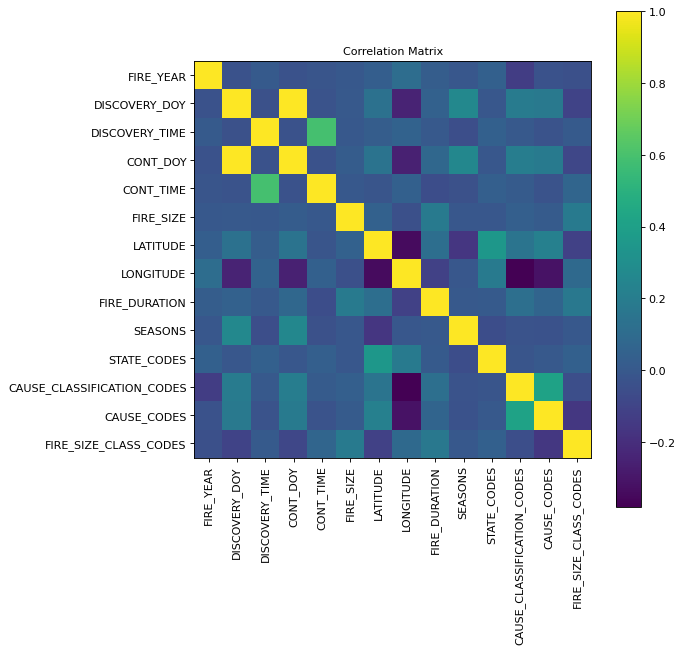

In [28]:
plotCorrelationMatrix(df_notKidding)

<ipython-input-20-aa950383fd1f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


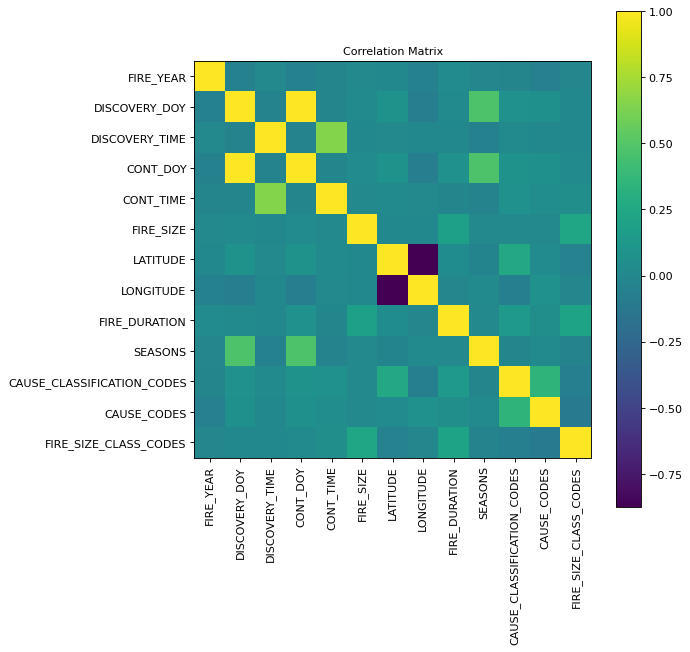

In [29]:
# using entire state data {function stack_returnStateData}
# correlation matrix for california data
plotCorrelationMatrix(californiaStack)

In [30]:
'''
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
'''

"\n# Distribution graphs (histogram/bar graph) of column data\ndef plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):\n    nunique = df.nunique()\n    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values\n    nRow, nCol = df.shape\n    columnNames = list(df)\n    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow\n    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')\n    for i in range(min(nCol, nGraphShown)):\n        plt.subplot(nGraphRow, nGraphPerRow, i + 1)\n        columnDf = df.iloc[:, i]\n        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):\n            valueCounts = columnDf.value_counts()\n            valueCounts.plot.bar()\n        else:\n            columnDf.hist()\n        plt.ylabel('counts')\n        plt.xticks(rotation = 90)\n        plt.title(f'{columnNames[i]} (column {i})')\n    plt.ti

creating a plot of top ten wildfire states

In [31]:
## Return the State Code Associated where Wild Fires are most present
def get_topX_states(df: pd.DataFrame, topX: int = 10):
  assert(topX > 0 and topX <= 52)
  topX_states = df.STATE_CODES.value_counts().index[:topX]

  return topX_states

In [32]:
get_topX_states(df)

Int64Index([5, 11, 45, 28, 4, 10, 35, 42, 26, 2], dtype='int64')

In [33]:
def plotTopXStates_Yearwise(df: pd.DataFrame, topX: int=10):
  topX_states = get_topX_states(df, topX)
  topX_state_names = [stateCode[state_code] for state_code in topX_states]
  fig = plt.figure()
  plt.figure(figsize=(18,10))
  fig.set_dpi(120)
  
  for state_code in topX_states:
    plt.plot(list_stateData[state_code - 1]["FIRE_YEAR"], list_stateData[state_code - 1]["NUMBER_OF_FIRES"])

  plt.legend(topX_state_names)
  plt.title(f'Top {topX} State WildFire Data Over Time', fontdict={'fontsize':15})
  plt.xlabel('Years')
  plt.ylabel('No. of Wildfires')
  plt.xticks(range(1992, 2020))
  plt.show()

<Figure size 720x480 with 0 Axes>

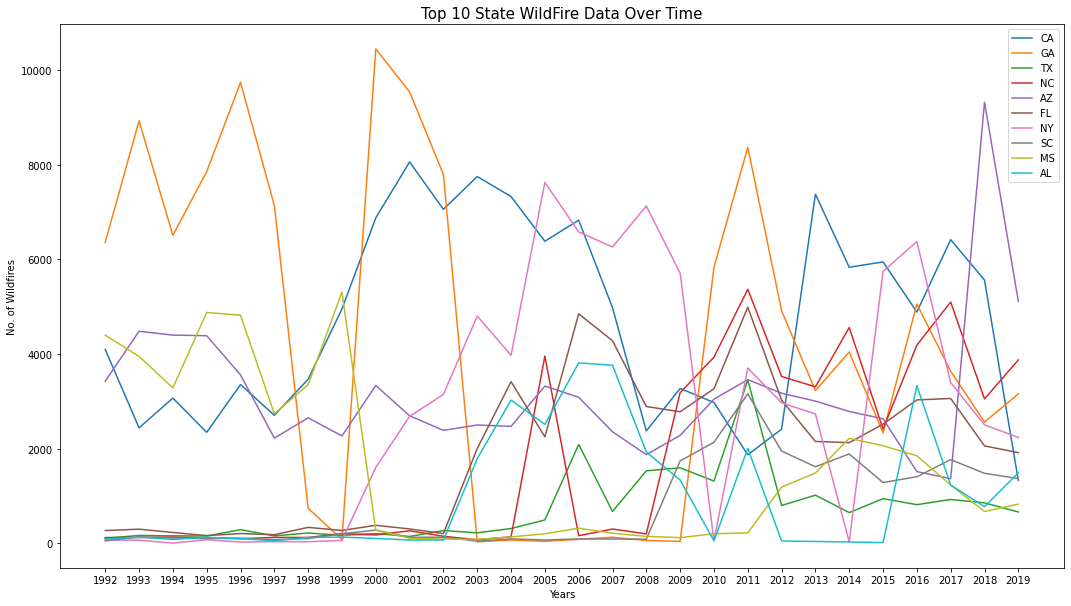

In [34]:
plotTopXStates_Yearwise(df, 10)

In [35]:
df_topTen = df_notKidding[df_notKidding.STATE_CODES.isin(get_topX_states(df, 10))]

<ipython-input-20-aa950383fd1f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


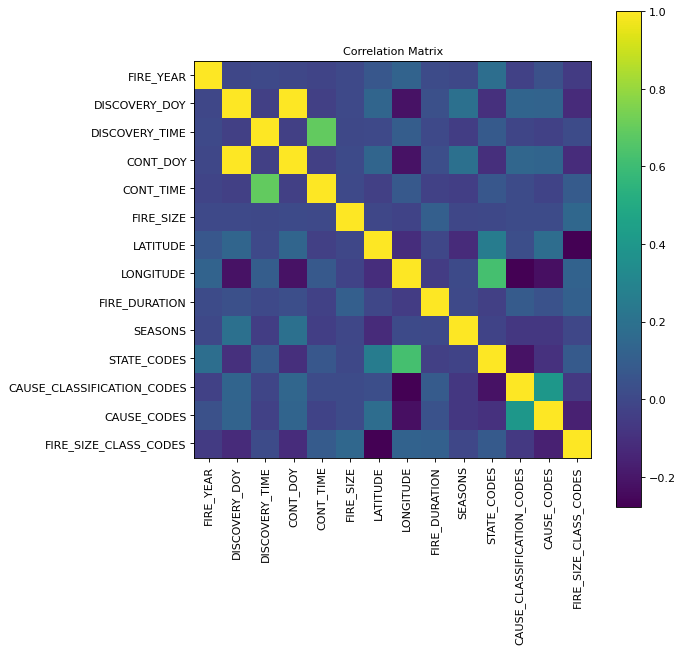

In [36]:
plotCorrelationMatrix(df_topTen)

<ipython-input-20-aa950383fd1f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


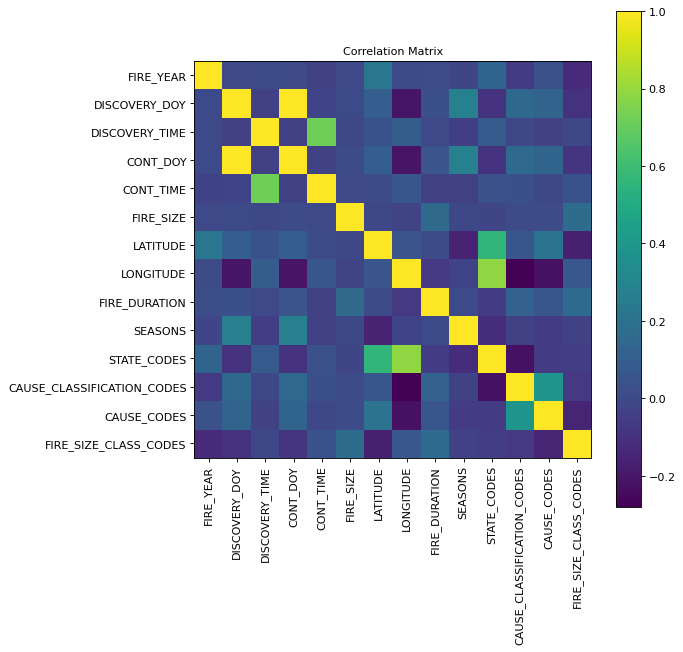

In [37]:
df_topFive = df_notKidding[df_notKidding.STATE_CODES.isin(get_topX_states(df_notKidding, 5))]
plotCorrelationMatrix(df_topFive )

In [38]:
TOP_TEN_WEST = ['CA', 'AZ', 'CO', 'OR']
TOP_TEN_EAST = ['NY', 'GA', 'NC', 'MS', 'FL']

TOP_TEN_WEST_STATE_CODES = [state_to_code[state] for state in TOP_TEN_WEST]
TOP_TEN_EAST_STATE_CODES = [state_to_code[state] for state in TOP_TEN_EAST]

<ipython-input-20-aa950383fd1f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


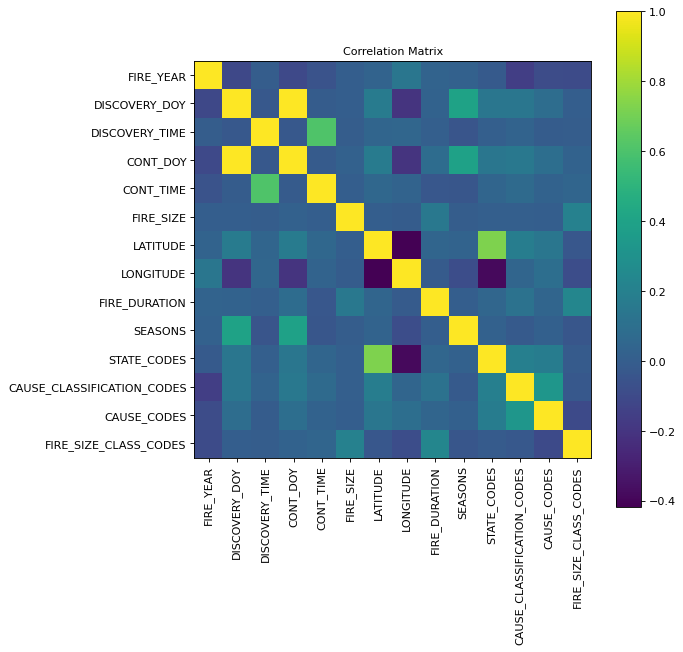

In [39]:
df_west = df_notKidding[df_notKidding.STATE_CODES.isin(TOP_TEN_WEST_STATE_CODES)]
plotCorrelationMatrix(df_west)

<ipython-input-20-aa950383fd1f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


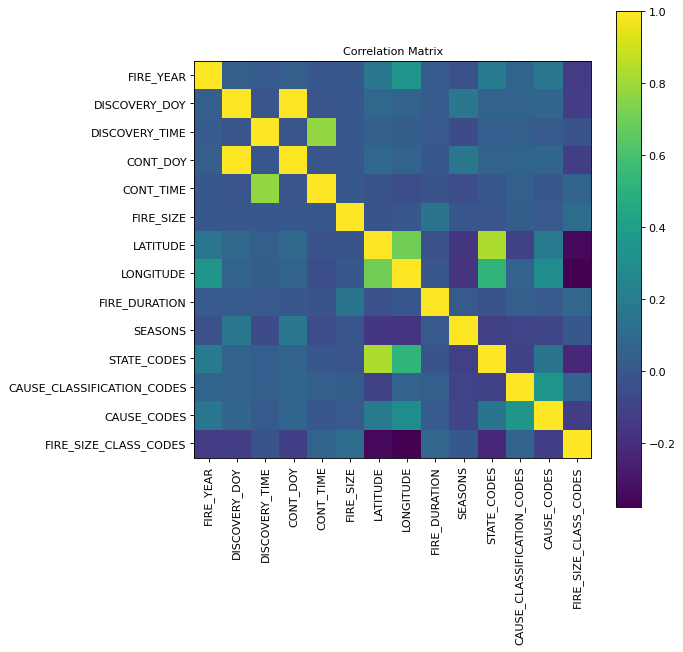

In [40]:
df_east = df_notKidding[df_notKidding.STATE_CODES.isin(TOP_TEN_EAST_STATE_CODES)]
plotCorrelationMatrix(df_east)

Top 10 states w.r.t average duration

In [41]:
def get_avg_duration(df: pd.DataFrame, topX: int = 10):
  avg_duration = {}

  topXstate = get_topX_states(df, topX)

  for state_code in topXstate:
    avg_duration[state_code] = []

    state_data = df[df.STATE_CODES == state_code]

    for year in range(1992, 2020):

      state_data_for_year = state_data[state_data.FIRE_YEAR == year]

      num_fires_for_year = state_data_for_year.shape[0]
      total_fire_duration_for_year = state_data_for_year.FIRE_DURATION.sum()

      avg_dur_for_year = total_fire_duration_for_year/num_fires_for_year
      avg_duration[state_code].append(avg_dur_for_year)

  return avg_duration

In [42]:
def get_avg_size(df: pd.DataFrame, topX: int = 10):
  avg_duration = {}

  topXstates = get_topX_states(df, topX)

  for state_code in topXstates:
    avg_duration[state_code] = []

    state_data = df[df.STATE_CODES == state_code]

    for year in range(1992, 2020):

      state_data_for_year = state_data[state_data.FIRE_YEAR == year]

      num_fires_for_year = state_data_for_year.shape[0]
      total_fire_duration_for_year = state_data_for_year.FIRE_SIZE.sum()

      avg_dur_for_year = total_fire_duration_for_year/num_fires_for_year
      avg_duration[state_code].append(avg_dur_for_year)

  return avg_duration

In [43]:
duration_of_fire = get_avg_duration(df_notKidding)
avg_size = get_avg_size(df_notKidding)

In [44]:
#avg_size

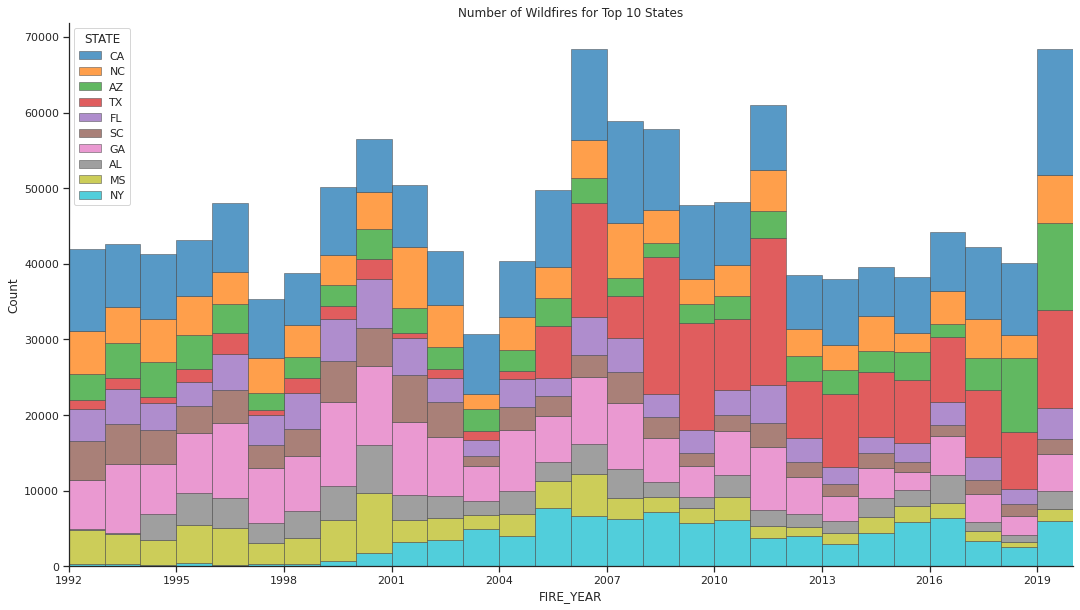

In [45]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(18, 10))
sns.despine(f)

top10states = get_topX_states(df, 10)
top10states_data = df[df.STATE_CODES.isin(top10states)]

plt.margins(x=0)
plt.title('Number of Wildfires for Top 10 States')


sns.histplot(
    top10states_data,
    x="FIRE_YEAR", hue="STATE",
    multiple="stack",
    palette="tab10",
    edgecolor=".3",
    linewidth=0.5,
    binwidth=1,
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks(np.arange(start=1992, stop=2020, step=3))

In [46]:
# durationNoJoke = pd.DataFrame.from_dict(duration_of_fire)
# avgFireNoJoke = pd.DataFrame.from_dict(avg_size)
# yearArray = np.arange(start = 1992, stop = 2020, step =1)
# durationNoJoke
durationNoJoke = pd.DataFrame.from_dict(duration_of_fire, orient = 'index').T
avgFireNoJoke = pd.DataFrame.from_dict(avg_size, orient = 'index').T

In [47]:
durationNoJoke = durationNoJoke.rename(columns={5: "CA", 11: "GA", 4: "AZ", 35: "NY", 6: "CO", 10: "FL", 28: "NC", 38: "OR", 37: "OK", 26: "MS"})
avgFireNoJoke = avgFireNoJoke.rename(columns={5: "CA", 11: "GA", 4: "AZ", 35: "NY", 6: "CO", 10: "FL", 28: "NC", 38: "OR", 37: "OK", 26: "MS"})

durationNoJoke.head()

,CA,GA,AZ,NY,CO,FL,NC,OR,OK,MS
0,767.013366,142.615994,762.114853,36.483333,705.148131,749.840590,628.608197,1072.646077,167.654907,109.127880
1,560.282753,170.216170,524.056971,53.337313,746.959490,761.768000,943.771200,727.368266,170.001579,97.061235
2,952.629241,167.726720,1064.701227,510.000000,1288.423194,784.277922,579.081818,1611.486313,213.709841,102.597261
3,687.579548,132.982179,813.423240,605.929870,907.728337,1563.903659,1681.728205,1091.138724,209.884489,111.998033
4,872.292908,130.156149,1459.899747,37.071429,1087.157080,952.866346,618.630928,2167.197218,199.077201,130.994484


Text(0.5, 1.0, 'Top 10 States - Average Duration of Fire by Year')

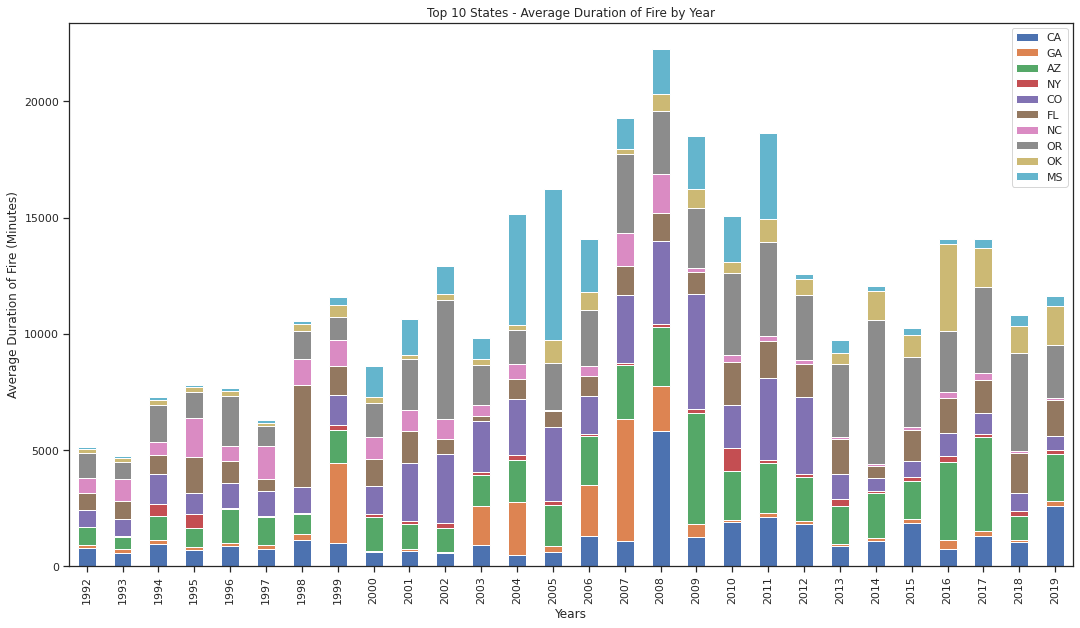

In [48]:
years = np.arange(start = 1992, stop = 2020, step = 1)
ax = durationNoJoke.plot(kind="bar", stacked=True, figsize = (18,10))
ax.set_xticklabels(years)
ax.set_xlabel("Years")
ax.set_ylabel("Average Duration of Fire (Minutes)")
ax.set_title("Top 10 States - Average Duration of Fire by Year")

Text(0.5, 1.0, 'Top 10 States - Average Fire Size by Year')

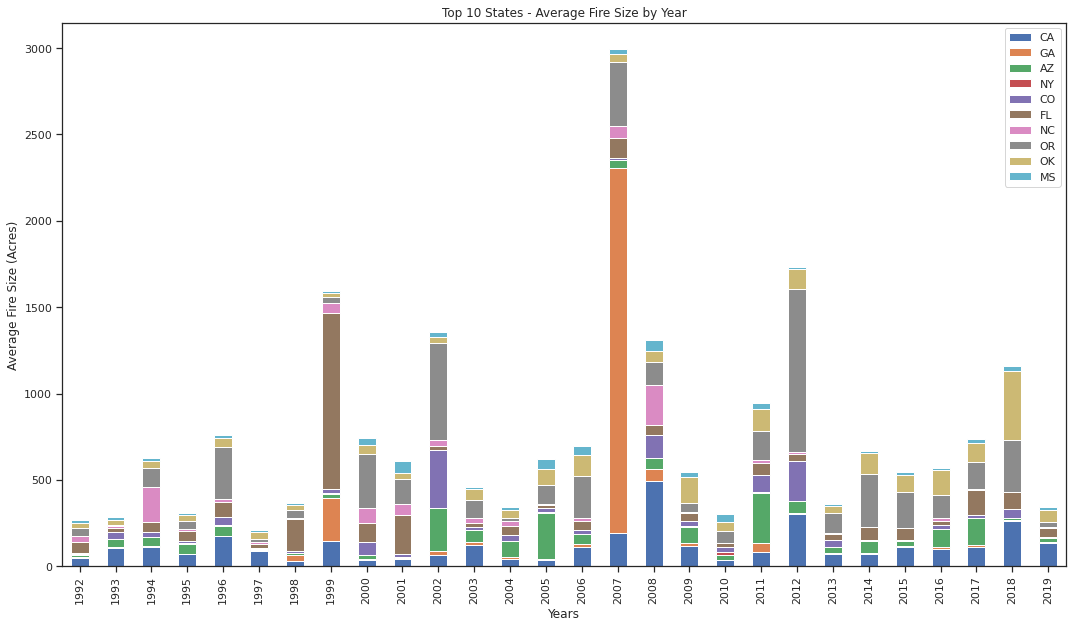

In [49]:
years = np.arange(start = 1992, stop = 2020, step = 1)
ax = avgFireNoJoke.plot(kind="bar", stacked=True, figsize = (18,10))
ax.set_xticklabels(years)
ax.set_xlabel("Years")
ax.set_ylabel("Average Fire Size (Acres)")
ax.set_title("Top 10 States - Average Fire Size by Year")

<ipython-input-20-aa950383fd1f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


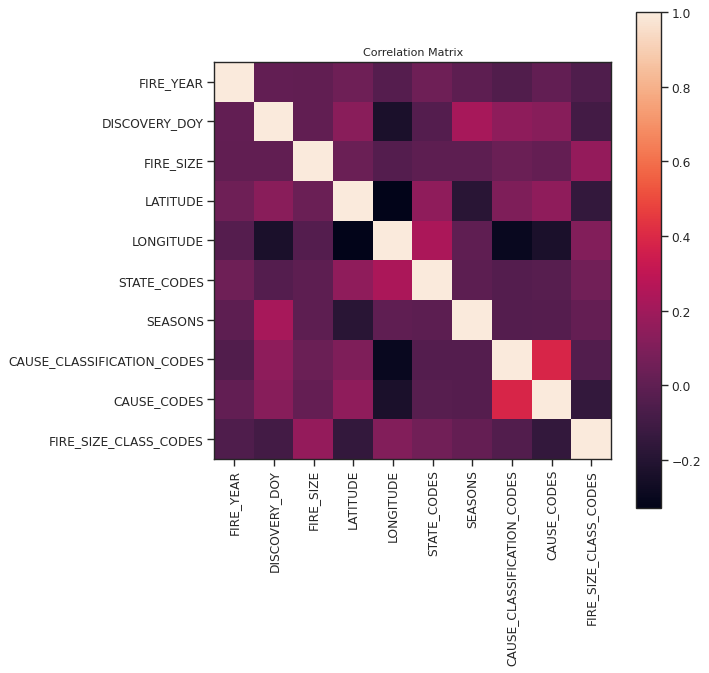

In [50]:
df = df.drop(columns=['OBJECTID', 'FOD_ID'])
df['FIRE_DURATION'] = duration_ofFire(df)
df['SEASONS'] = seasons(df)
df['STATE_CODES'] = assignStateCodes(df)
df['CAUSE_CLASSIFICATION_CODES'] = assignCauseClassification(df)
df['CAUSE_CODES'] = assignCauseCodes(df)
df['FIRE_SIZE_CLASS_CODES'] = assignFireSizeClassCodes(df)
plotCorrelationMatrix(df)

In [51]:
df_TenJk = df[df.STATE_CODES.isin(get_topX_states(df))]

In [52]:
df_TenJk

,Shape,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,STATE,COUNTY,FIPS_CODE,FIPS_NAME,STATE_CODES,FIRE_DURATION,SEASONS,CAUSE_CLASSIFICATION_CODES,CAUSE_CODES,FIRE_SIZE_CLASS_CODES
0,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,...,CA,63.0,6063.0,Plumas County,5,258.0,16,33,30,20
1,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,...,CA,61.0,6061.0,Placer County,5,411.0,4,99,24,20
2,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,...,CA,17.0,6017.0,El Dorado County,5,61.8,8,33,6,20
3,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,...,CA,3.0,6003.0,Alpine County,5,7200.0,8,99,24,20
4,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,...,CA,3.0,6003.0,Alpine County,5,7200.0,8,99,24,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303553,b'\x00\x01\xad\x10\x00\x00\xc8O\x0f\xa9`/V\xc0...,ICS209_2019_10784668,INTERAGCY,IA-ICS209,FS,USMSMNF,National Forests in Mississippi,MSMNF,National Forests in Mississippi,NaN,...,MS,Wayne,28153.0,Wayne County,26,NaN,8,33,18,80
2303556,b'\x00\x01\xad\x10\x00\x00|?q\n\xcf*^\xc0\xb0u...,ICS209_2019_10802166,INTERAGCY,IA-ICS209,FS,USCAPNF,Plumas National Forest,CAPNF,Plumas National Forest,NaN,...,CA,Plumas,6063.0,Plumas County,5,NaN,12,66,18,140
2303557,b'\x00\x01\xad\x10\x00\x00h\x8a?\x0b{\xd3U\xc0...,ICS209_2019_10805176,INTERAGCY,IA-ICS209,FS,USALALF,National Forests in Alabama,ALALF,National Forests in Alabama,NaN,...,AL,Bibb,1007.0,Bibb County,2,NaN,12,66,18,100
2303560,b'\x00\x01\xad\x10\x00\x00\x1c\x02eX\x87aT\xc0...,ICS209_2020_11703752,INTERAGCY,IA-ICS209,ST/C&L,USFLFLS,Florida Forest Service,FLFLS,Florida Forest Service,NaN,...,FL,Collier,12021.0,Collier County,10,NaN,4,66,18,120


<ipython-input-20-aa950383fd1f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


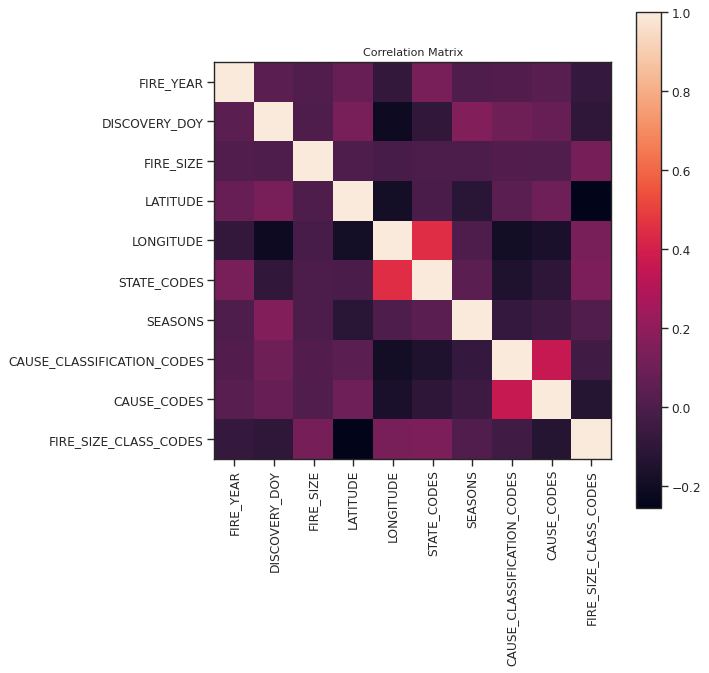

In [53]:
plotCorrelationMatrix(df_TenJk)